## Quantum Illumination Experiment 2

__Find the optimal configurations for PCS state (coherent superpostion of photon subtraction and addition).__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

--- 19898.92664051056 seconds ---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# configuration
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
# np.set_printoptions(threshold='nan', precision=6, suppress=True)

# plt.style.use(['seaborn-whitegrid', '14pt'])
plt.style.use(['14pt'])
%matplotlib inline

In [2]:
df1 = pd.read_csv('../output/data/expr_2_pcs_nth_1.0_div_11_04-13.csv', comment='#')
df2 = pd.read_csv('../output/data/expr_2_pcs_nth_1_grid_26_09-22.csv', comment='#')

In [3]:
df1.head()

,nmax,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,24,1.0,0.01,PCS,0.5,2.400000,1.458301,0.472706,0.498733,0.5,1.200000,1.200000,0.0,0.0
1,24,1.0,0.01,PCS,0.5,2.425447,1.448362,0.472470,0.498712,0.5,1.196819,1.228628,0.0,0.1
2,24,1.0,0.01,PCS,0.5,2.500000,1.420332,0.471787,0.498653,0.5,1.187500,1.312500,0.0,0.2
3,24,1.0,0.01,PCS,0.5,2.618596,1.379318,0.470734,0.498560,0.5,1.172676,1.445920,0.0,0.3
4,24,1.0,0.01,PCS,0.5,2.773723,1.333046,0.469429,0.498444,0.5,1.153285,1.620438,0.0,0.4


In [4]:
df2.head()

,Nth,R,State,lambda,ra,rb,Aver_N,A_aver_N,B_aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s
0,1,0.01,PCS,0.099504,0.0,0.00,0.079608,0.039804,0.039804,0.168732,0.493447,0.499923,0.500215
1,1,0.01,PCS,0.099504,0.0,0.04,0.085873,0.039773,0.046100,0.168612,0.493421,0.499922,0.500156
2,1,0.01,PCS,0.099504,0.0,0.08,0.104552,0.039680,0.064871,0.168255,0.493341,0.499919,0.500156
3,1,0.01,PCS,0.099504,0.0,0.12,0.135298,0.039528,0.095770,0.167669,0.493214,0.499915,0.500098
4,1,0.01,PCS,0.099504,0.0,0.16,0.177552,0.039319,0.138233,0.166866,0.493043,0.499908,0.500039


### Nth = 0.1

In [5]:
size = 11
X1 = df1['ra'].values.reshape(size, size)
Y1 = df1['rb'].values.reshape(size, size)
hb1 = df1['Helstrom_Bound'].values.reshape(size, size)
cb1 = df1['Chernoff_Bound'].values.reshape(size, size)
n1 = df1['Aver_N'].values.reshape(size, size)
vn1 = df1['VN_Entropy'].values.reshape(size, size)
na1 = df1['A_aver_N'].values.reshape(size, size)
nb1 = df1['B_aver_N'].values.reshape(size, size)

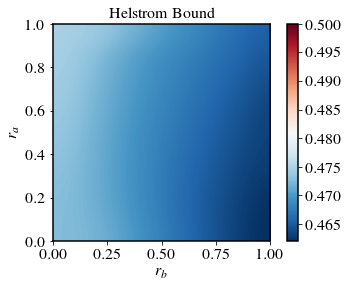

In [6]:
plt.imshow(hb1, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Helstrom Bound')
# plt.savefig('../output/figures/g_pcs_qhb_01.pdf', bbox_inches='tight')

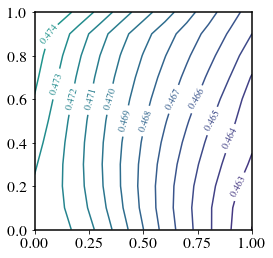

In [7]:
fig = plt.contour(Y1, X1, hb1, levels=np.arange(0.458, 0.49, 0.001))
plt.clabel(fig, inline=1, fontsize=10)
plt.axes().set_aspect('equal')

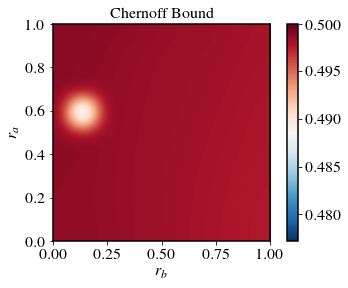

In [8]:
plt.imshow(cb1, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Chernoff Bound')
# plt.savefig('../output/g_pcs_qcb_01.pdf', bbox_inches='tight')

/home/rigel/anaconda3/envs/qutip-env/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


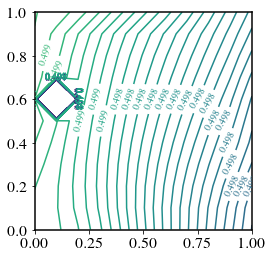

In [11]:
fig = plt.contour(Y1, X1, cb1, levels=np.arange(0.4965, 0.5, 0.00005))
plt.clabel(fig, inline=1, fontsize=10)
plt.axes().set_aspect('equal')

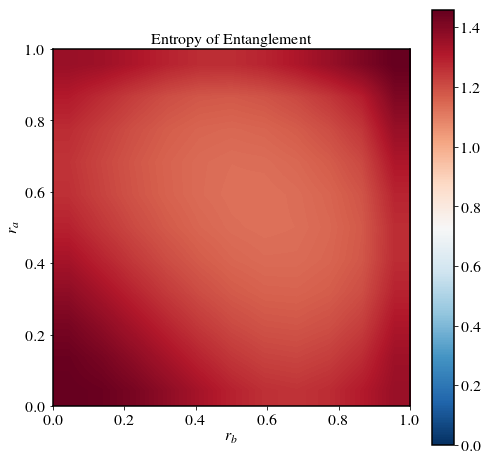

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(vn1, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Entropy of Entanglement')
# plt.savefig('../output/g_pcs_vn_01.pdf', bbox_inches='tight')

/home/rigel/anaconda3/envs/qutip-env/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


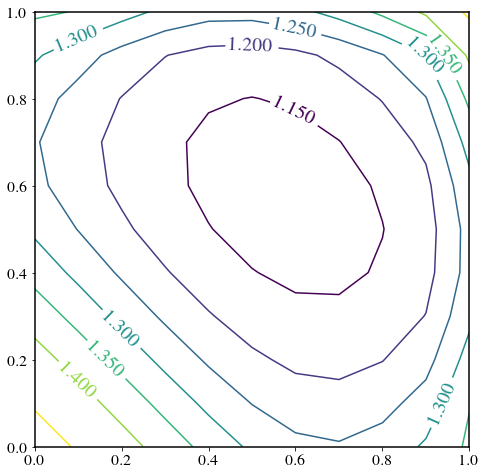

In [15]:
plt.figure(figsize=(8,8))
fig = plt.contour(Y1, X1, vn1)
plt.clabel(fig, inline=1, fontsize=20)
plt.axes().set_aspect('equal')

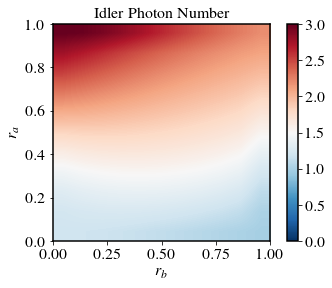

In [17]:
plt.imshow(na1, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Idler Photon Number')
plt.savefig('../output/g_pcs_na_01.pdf', bbox_inches='tight')

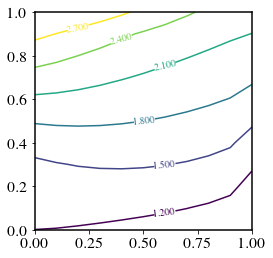

In [18]:
fig = plt.contour(Y1, X1, na1)
plt.clabel(fig, inline=1, fontsize=10)
plt.axes().set_aspect('equal')

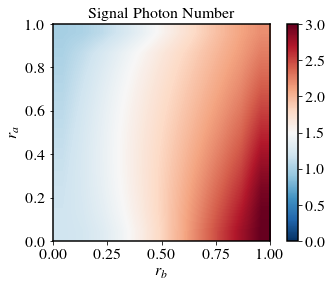

In [19]:
plt.imshow(nb1, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Signal Photon Number')
plt.savefig('../output/g_pcs_nb_01.pdf', bbox_inches='tight')

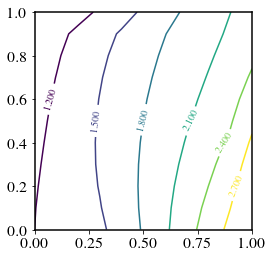

In [20]:
fig = plt.contour(Y1, X1, nb1)
plt.clabel(fig, inline=1, fontsize=10)
plt.axes().set_aspect('equal')

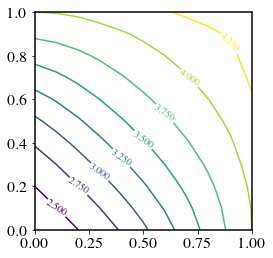

In [21]:
fig = plt.contour(Y1, X1, n1)
plt.clabel(fig, inline=1, fontsize=10)
plt.axes().set_aspect('equal')

### Nth = 1.0

In [38]:
size = 26
X2 = df2['ra'].values.reshape(size, size)
Y2 = df2['rb'].values.reshape(size, size)
hb2 = df2['Helstrom_Bound'].values.reshape(size, size)
cb2 = df2['Chernoff_Bound'].values.reshape(size, size)
n2 = df2['Aver_N'].values.reshape(size, size)
vn2 = df2['VN_Entropy'].values.reshape(size, size)
na2 = df2['A_aver_N'].values.reshape(size, size)
nb2 = df2['B_aver_N'].values.reshape(size, size)

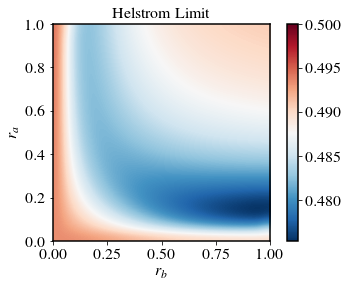

In [39]:
plt.imshow(hb2, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Helstrom Limit')
# plt.savefig('../output/g_pcs_qhb_1.pdf', bbox_inches='tight')

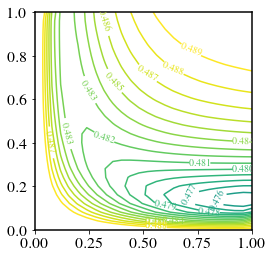

In [42]:
fig = plt.contour(Y2, X2, hb2, levels=np.arange(0.46, 0.49, 0.001))
plt.clabel(fig, inline=1, fontsize=10)
plt.axes().set_aspect('equal')

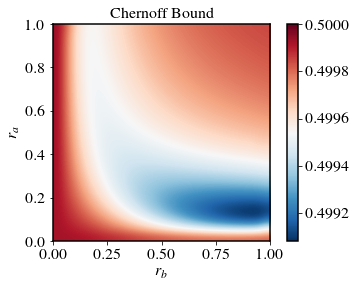

In [19]:
plt.imshow(cb2, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Chernoff Bound')
# plt.savefig('../output/g_pcs_qcb_1.pdf', bbox_inches='tight')

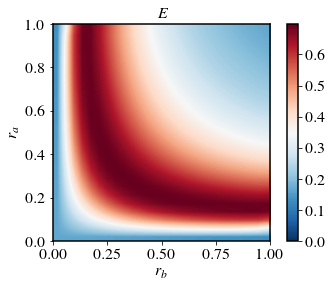

In [20]:
plt.imshow(vn2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('$E$')
# plt.savefig('../output/g_pcs_vn_1.pdf', bbox_inches='tight')

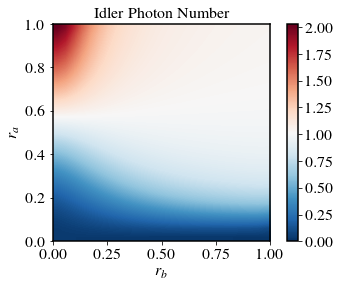

In [21]:
plt.imshow(na2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Idler Photon Number')
# plt.savefig('../output/g_pcs_na_1.pdf', bbox_inches='tight')

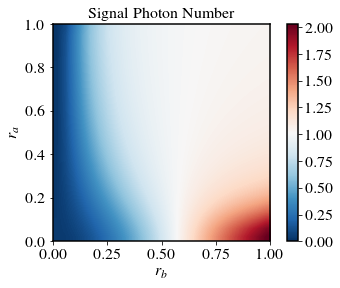

In [22]:
plt.imshow(nb2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Signal Photon Number')
# plt.savefig('../output/g_pcs_nb_1.pdf', bbox_inches='tight')

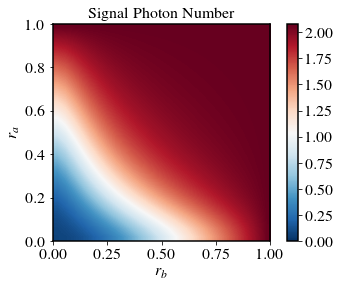

In [23]:
plt.imshow(n2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Signal Photon Number')
# plt.savefig('../output/g_pcs_n_1.pdf', bbox_inches='tight')